In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

%pip install roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.62 MiB | 13.66 MiB/s, done.
Resolving deltas: 100% (12001/12001), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="AzLoREv8n2IRJ0IIySEM")
project = rf.workspace("custom-yolov5-dontw").project("detection-knjsx")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to detection-2 in yolov5pytorch:: 100%|██████████| 520/520 [00:00<00:00, 6088.12it/s]


In [14]:
!python train.py --img 416 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5n.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-21 07:47:11.797043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753084031.817543    5861 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753084031.823825    5861 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
train: weights=yolov5n.pt, cfg=, data=/content/yolov5/detection-2/data.ya

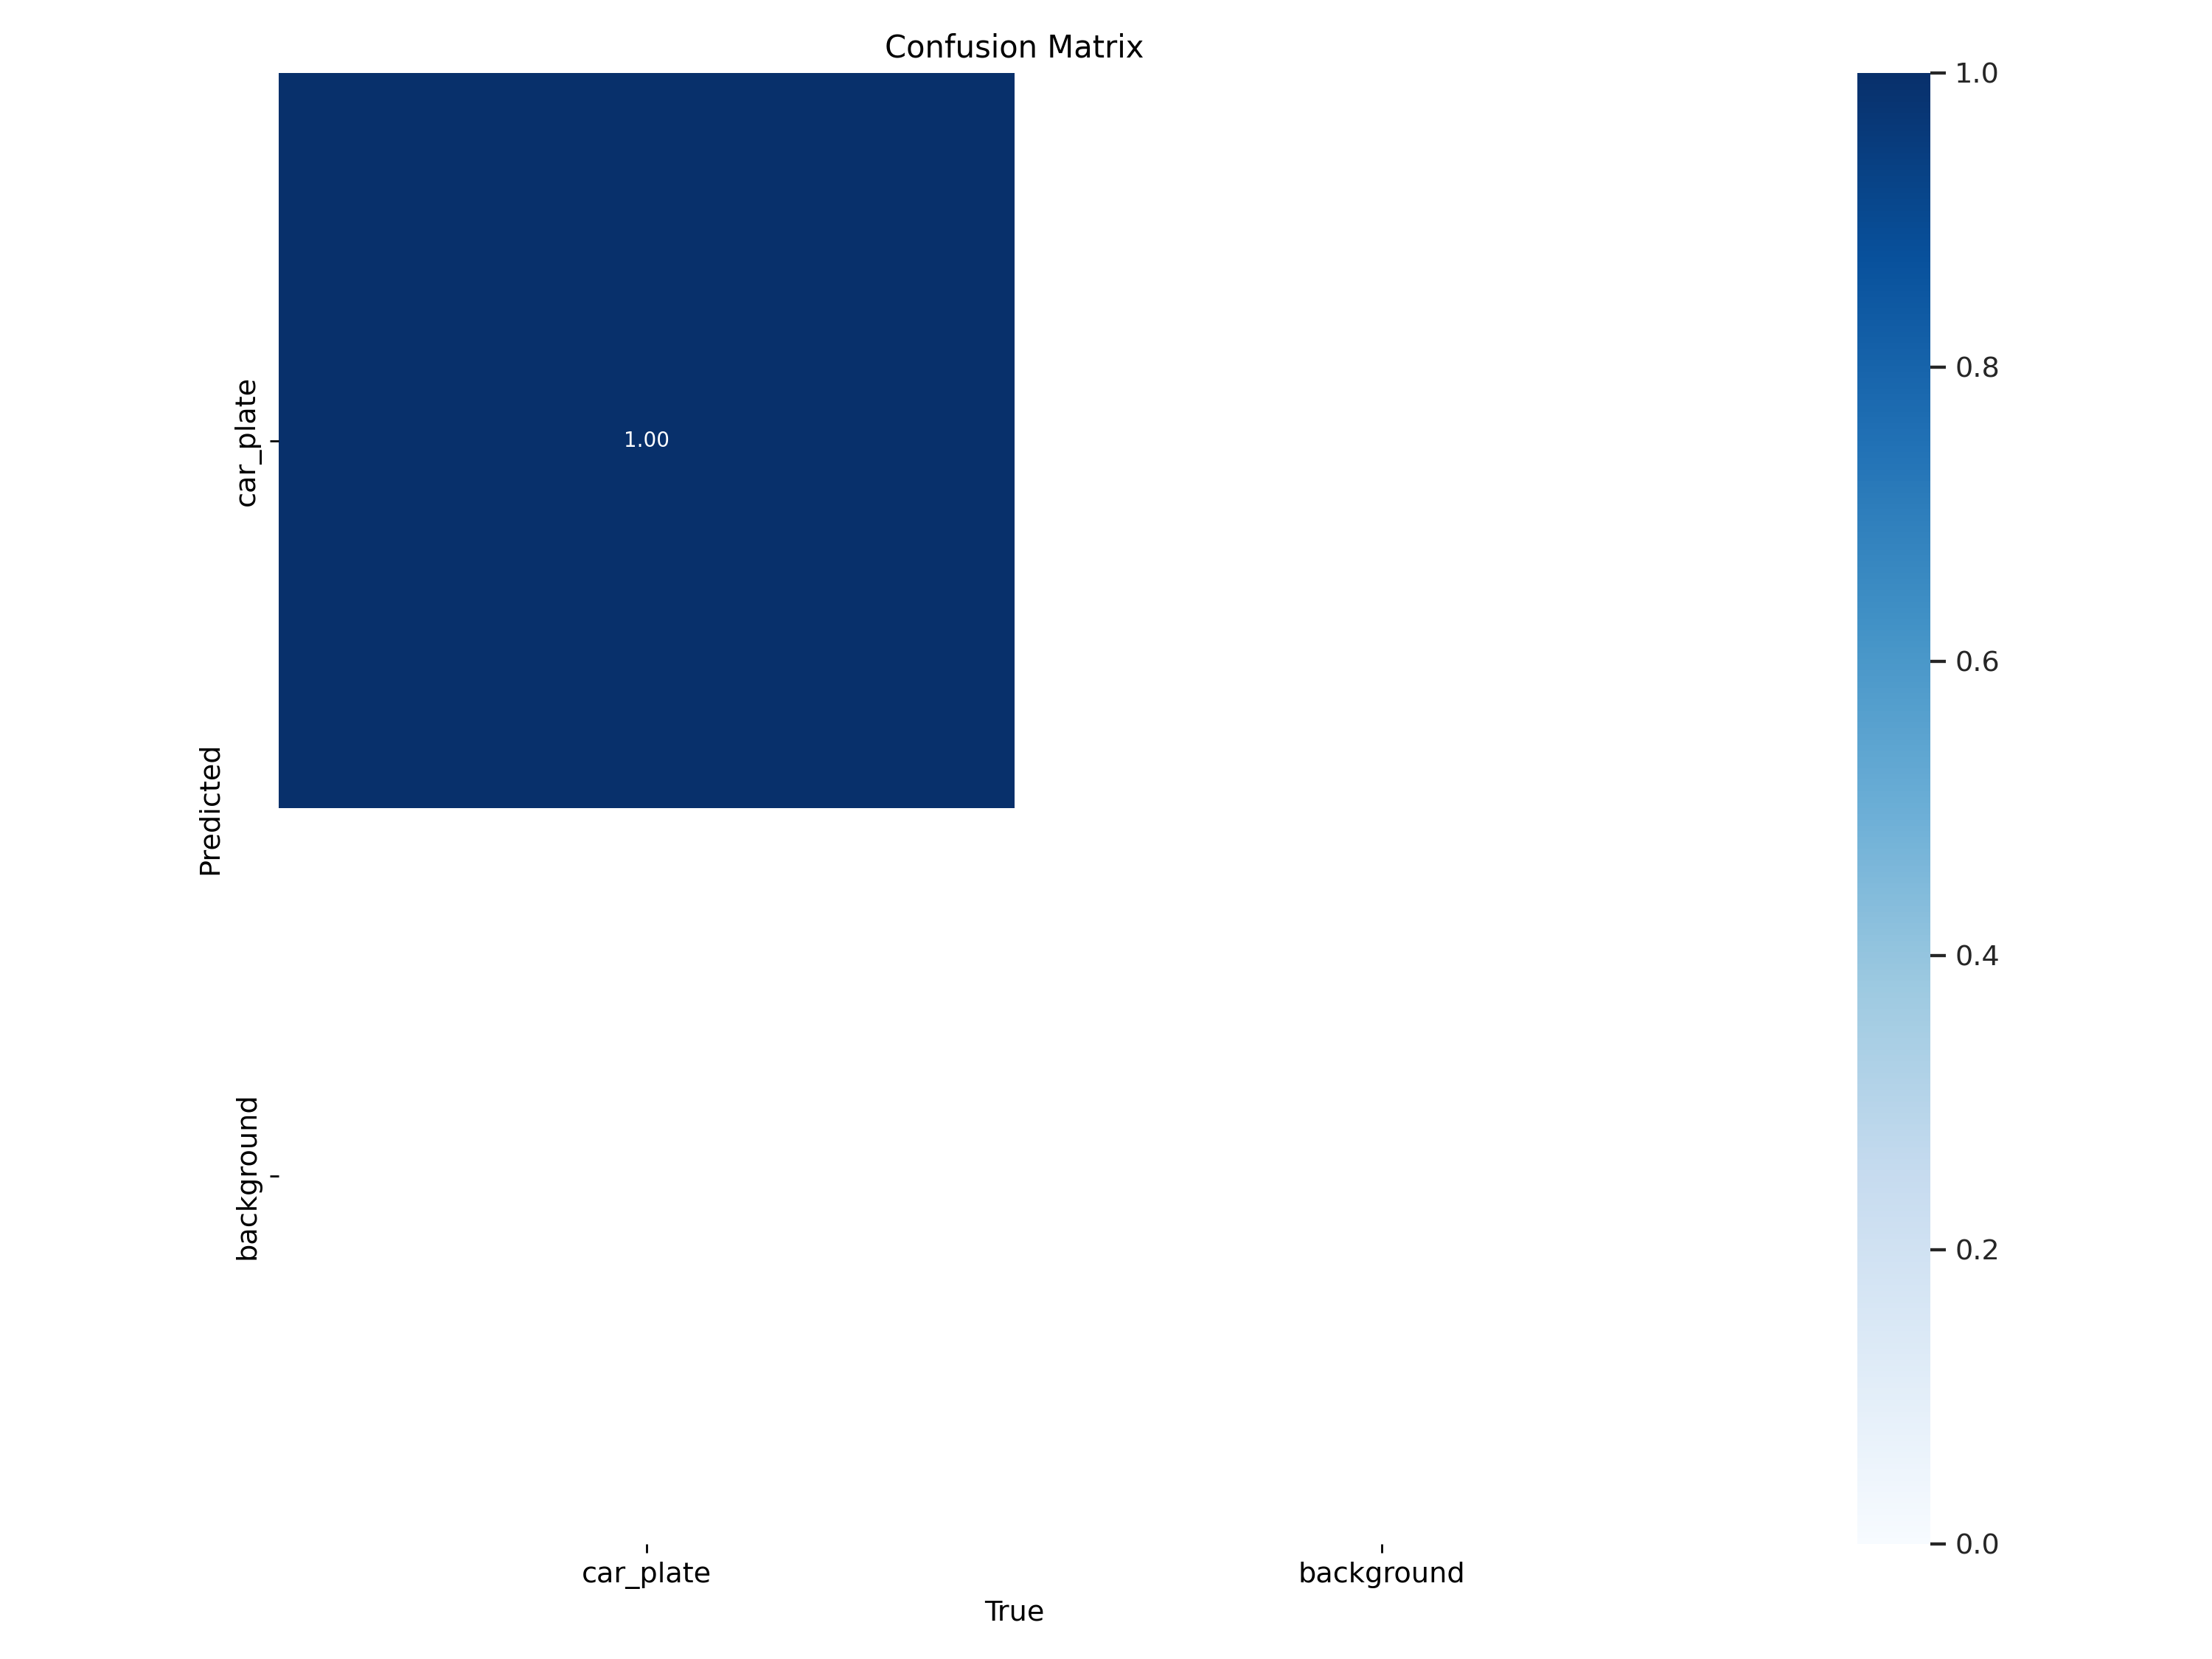

In [15]:
Image(filename=f'/content/yolov5/runs/train/exp3/confusion_matrix.png', width=600)

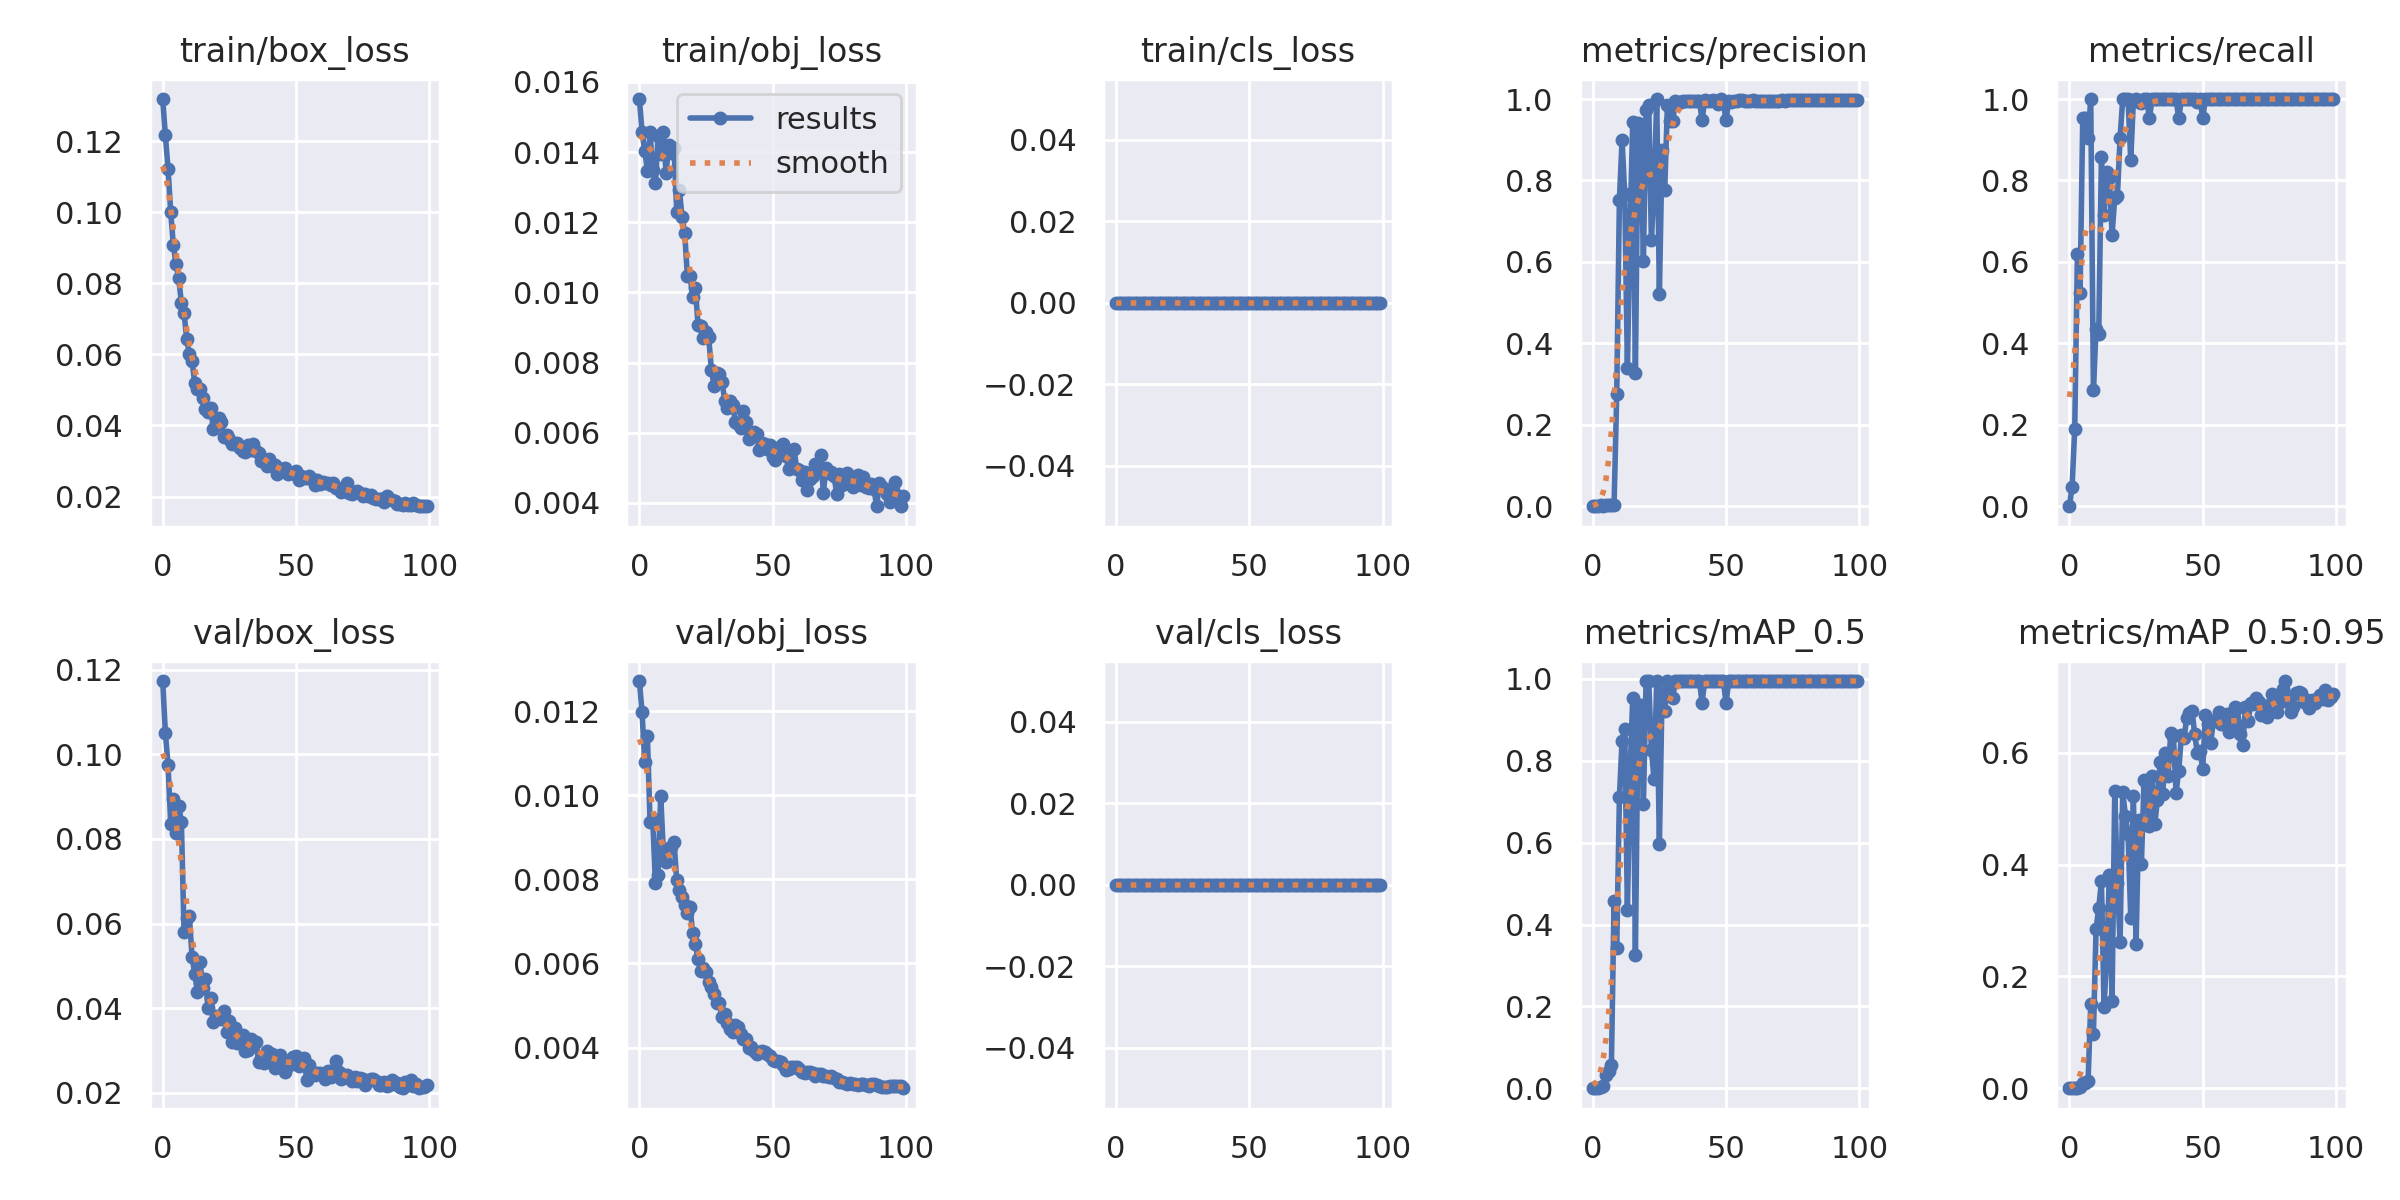

In [17]:
Image(filename=f'/content/yolov5/runs/train/exp3/results.png', width=800)

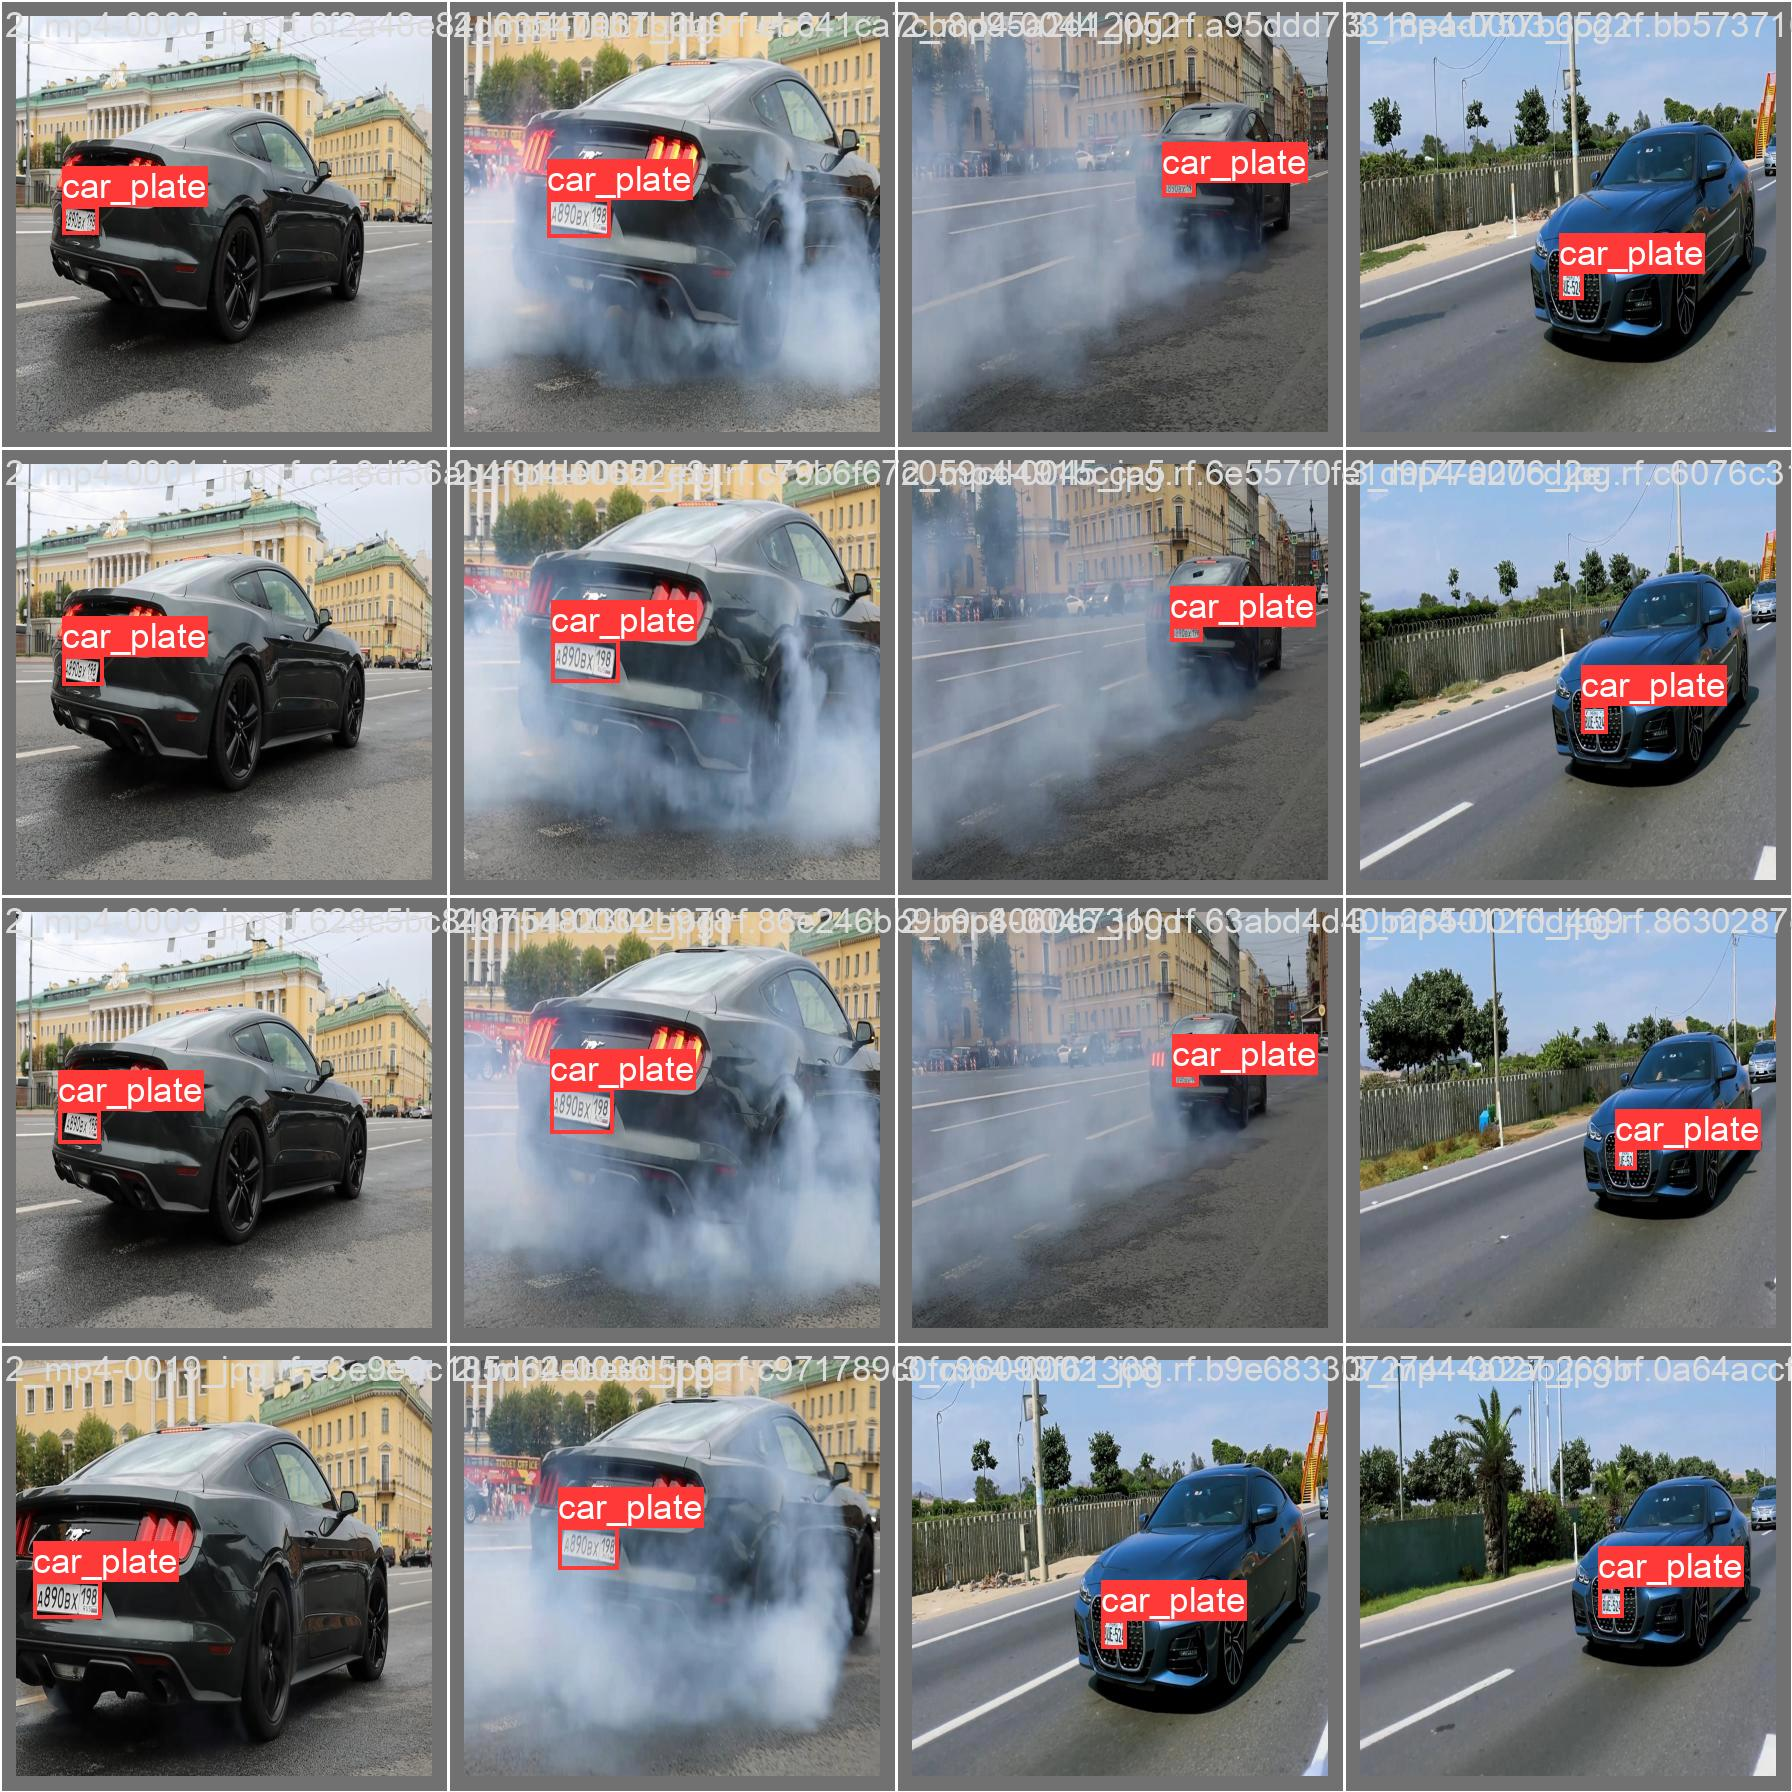

In [18]:
Image(filename=f'/content/yolov5/runs/train/exp3/val_batch0_labels.jpg', width=800)

In [23]:
!python detect.py --weights runs/train/exp3/weights/best.pt --source /content/yolov5/detection-2/test/images --imgsz 416 --conf-thres 0.25

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/yolov5/detection-2/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/11 /content/yolov5/detection-2/test/images/2_mp4-0002_jpg.rf.09723e2d875d678f3ceb21d62c0a6cca.jpg: 416x416 1 car_plate, 8.8ms
image 2/11 /content/yolov5/detection-2/test/images/2_mp4-0009_jpg.rf.913078066f0c3169c1fcf42aacddbbf7.jpg: 416x416 1 car_plate, 7.8ms
image 3/11 /content/yolov5

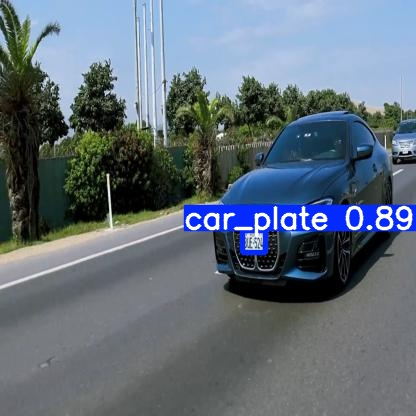

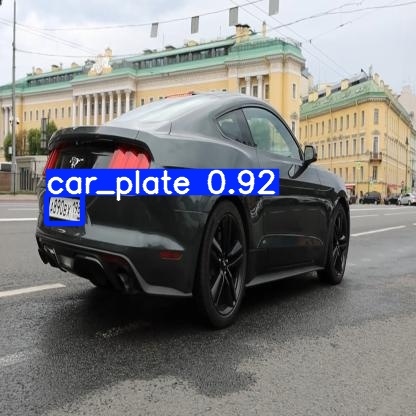

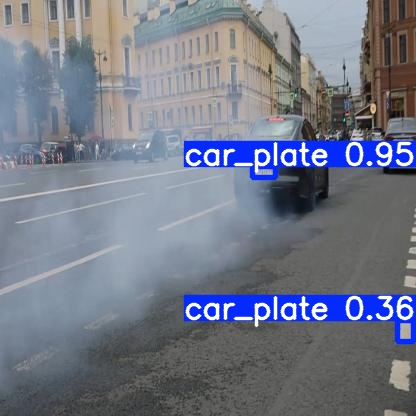

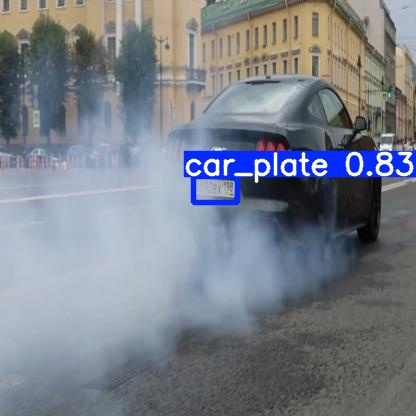

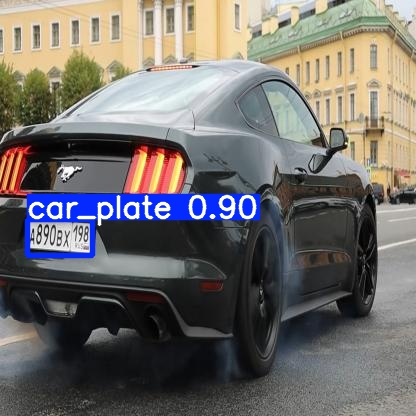

In [30]:
import glob

latest_folder = max(glob.glob('/content/yolov5/runs/detect/exp*'), key=os.path.getmtime)

for img_path in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(Image(filename=img_path))
    print("\n")
